In [11]:
import os

In [12]:
%pwd

'd:\\GUVI Machine Learning BootCamp\\Final Project\\Customer Review Research\\research'

In [13]:
os.chdir("../")

In [14]:
%pwd

'd:\\GUVI Machine Learning BootCamp\\Final Project\\Customer Review Research'

In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import os
import seaborn as sns
from scipy import stats
import warnings

In [4]:
df = pd.read_csv(r"customer_review_with_rating.csv")

In [5]:
df.head()

,Unnamed: 0,Id,Review-Title,rating,Review-Body,Product Name,rating_num
0,0,1,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1.0
1,1,2,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2.0
2,2,3,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5.0
3,3,4,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3.0
4,4,5,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1.0


In [5]:
df["rating"].unique()

array(['1.0 out of 5 stars', '2.0 out of 5 stars', '5.0 out of 5 stars',
       '3.0 out of 5 stars', '4.0 out of 5 stars'], dtype=object)

In [7]:
df["rating"].unique()

array(['1.0 out of 5 stars', '2.0 out of 5 stars', '5.0 out of 5 stars',
       '3.0 out of 5 stars', '4.0 out of 5 stars'], dtype=object)

In [8]:
df["Product Name"].unique()

array(['OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)',
       'OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)',
       'realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)',
       'Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM',
       'Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)',
       'Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)',
       'Samsung Galaxy M32',
       'vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)'],
      dtype=object)

In [11]:
len(df["Product Name"].unique())

8

In [6]:
df.describe(include=['object']).T

,count,unique,top,freq
Review-Title,23775,15040,Good,1295
rating,23777,5,5.0 out of 5 stars,9399
Review-Body,23160,18597,Good,962
Product Name,23777,8,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",4460


In [8]:
from wordcloud import WordCloud 
wc = WordCloud(width=800,
               height=500,
               background_color='white',
               min_font_size=10)

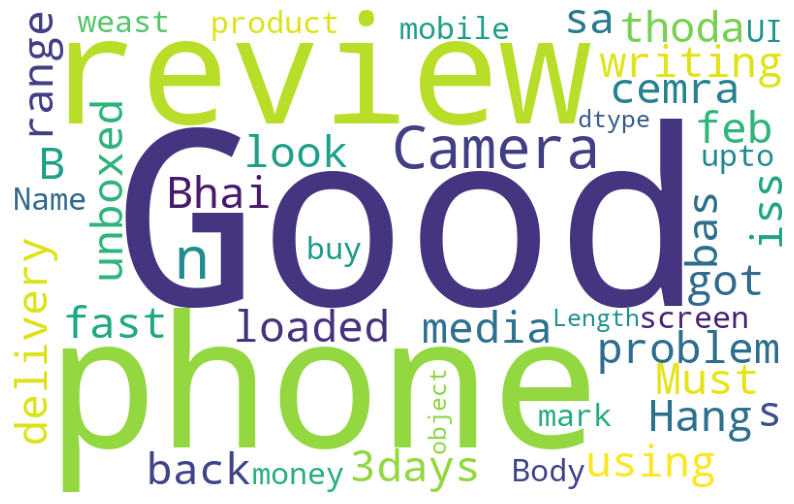

In [10]:
wc.generate(''.join(str(df['Review-Body'])))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.boxenplot( y="course_rating", data=df,
                   showfliers=False,color='orange')
ax = sns.stripplot( y="course_rating", data=df,
                   size=4, color="maroon",alpha=0.2)
ax.axes.set_title("\ncourse Rating Distribution\n",fontsize=30)

In [14]:
df.isnull().sum()

Unnamed: 0        0
Review-Title      2
rating            0
Review-Body     617
Product Name      0
dtype: int64

In [16]:
df["rating_num"] = df["rating"].apply(lambda x: float(x.split()[0]))

In [17]:
df["rating_num"].unique()

array([1., 2., 5., 3., 4.])

Text(0.5, 1.0, '\nMobile Phone Rating Distribution\n')

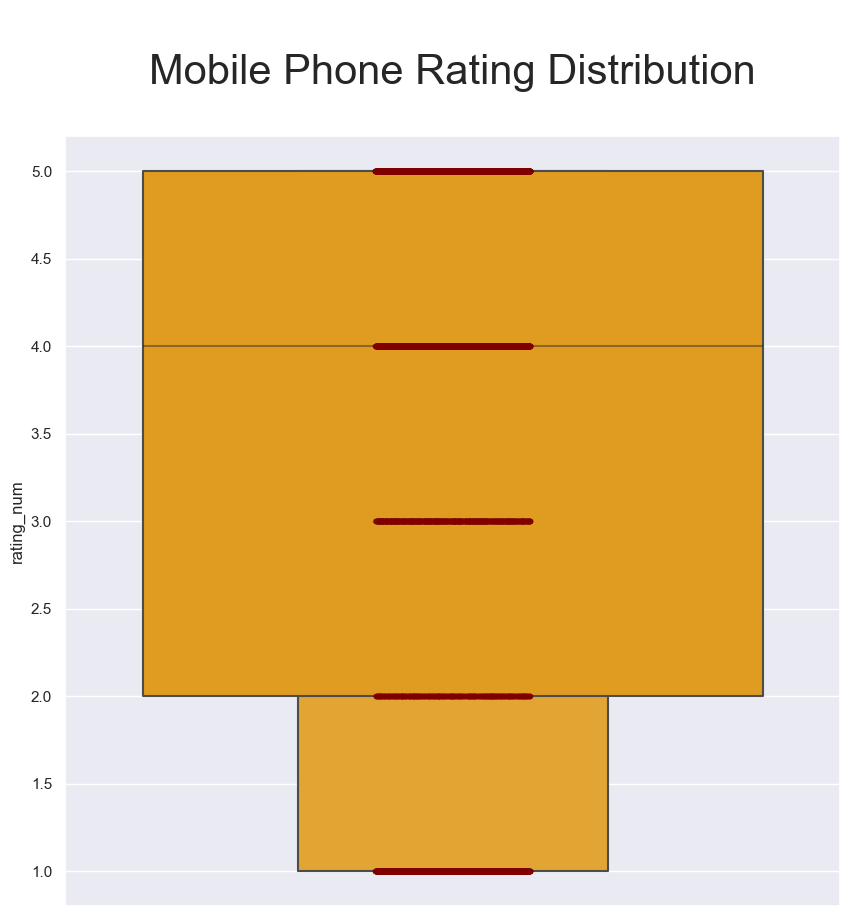

In [18]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.boxenplot( y="rating_num", data=df,
                   showfliers=False,color='orange')
ax = sns.stripplot( y="rating_num", data=df,
                   size=4, color="maroon",alpha=0.2)
ax.axes.set_title("\nMobile Phone Rating Distribution\n",fontsize=30)

C:\Users\Naveen\AppData\Local\Temp\ipykernel_14220\374261241.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p=sns.distplot(df['rating_num'],color='darkcyan',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")


Text(0.5, 1.0, '\ncourse Rating Distribution\n')

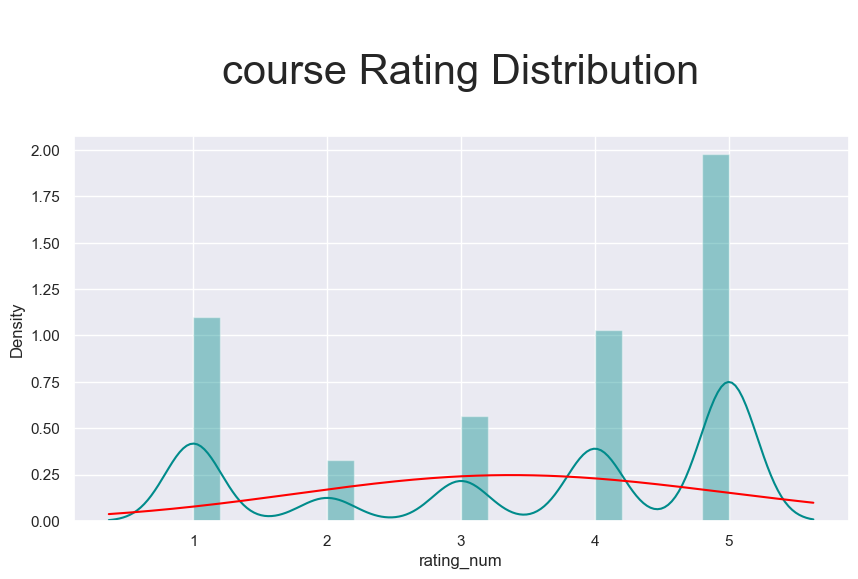

In [19]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.distplot(df['rating_num'],color='darkcyan',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")
p.axes.set_title("\ncourse Rating Distribution\n",fontsize=30)

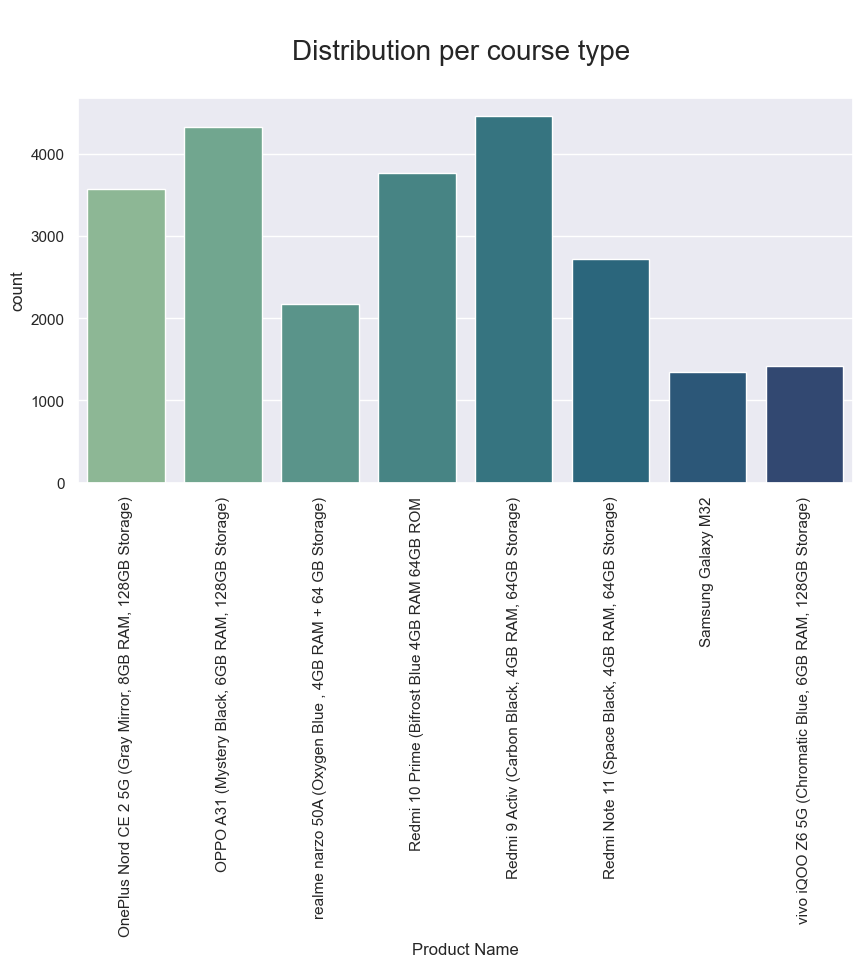

In [21]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot( x="Product Name", data=df,palette="crest")
ax.axes.set_title("\nDistribution per course type \n",fontsize=20)
ax.tick_params(axis='x', rotation=90)

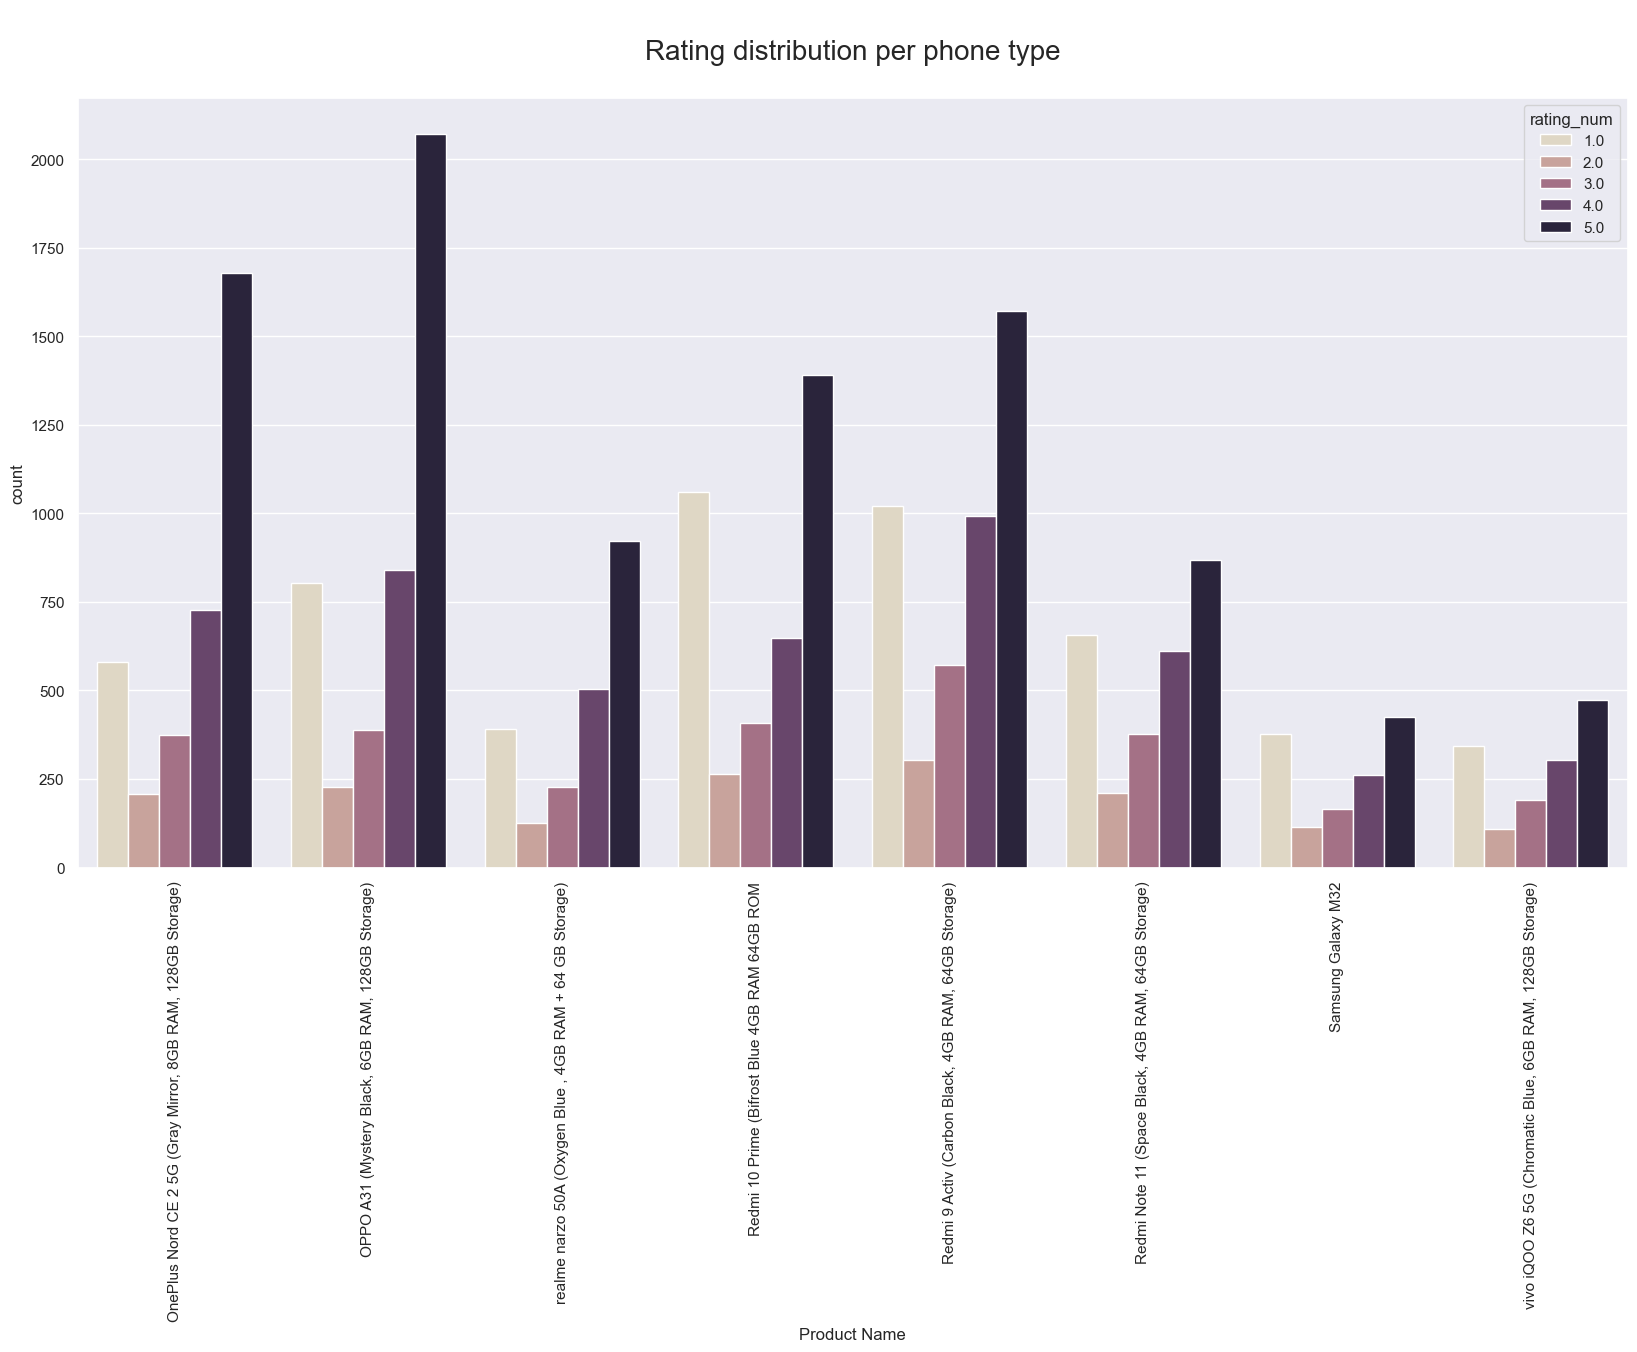

In [23]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(hue="rating_num", x="Product Name", data=df,palette="ch:s=-.2,r=.6")
ax.axes.set_title("\nRating distribution per phone type\n",fontsize=20)
ax.tick_params(axis='x', rotation=90)